# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [53]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn import datasets

# 2. Check how many records do we have


In [18]:
pima_df = pd.read_csv("GermanCredit.csv")
pima_df.count()
pima_df['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 3. Plot Histogram for column 'CreditAmount'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BB9FA5048>]],
      dtype=object)

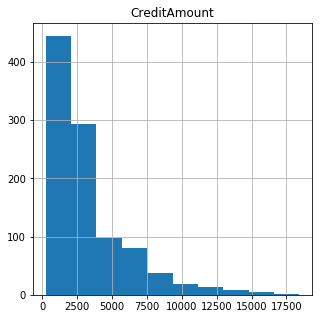

In [29]:
pima_df.hist(column='CreditAmount',figsize=(5,5))

# 3b. Create creditability dataframe

In [40]:
amountIntervalsPoints = np.array([0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000])
amountIntervals = [(amountIntervalsPoints[i] + int(i != 0), amountIntervalsPoints[i + 1]) for i in np.arange(len(amountIntervalsPoints) - 1)]
amountIntervals
amountIntervalsDf = pd.DataFrame(amountIntervals, columns = ['intervalLeftSide', 'intervalRightSide'])
amountIntervalsDf
#Credibility table preparation
Credibility0 = []
Credibility1 = []
for interval in amountIntervals:
    subData = pima_df[pima_df.CreditAmount >= interval[0]]
    subData = subData[subData.CreditAmount <= interval[1]]
    Credibility0.append(sum(subData.Creditability == 0))
    Credibility1.append(sum(subData.Creditability == 1))
tempDf = pd.DataFrame(np.column_stack([Credibility0, Credibility1]), columns = ['Credibiliity0', 'Credibiliity1'])
tempDf

,Credibiliity0,Credibiliity1
0,3,15
1,34,64
2,51,139
3,33,93
4,26,79
5,75,200
6,34,68
7,20,26
8,21,14
9,3,2


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [43]:
compareCreditWorthinessDf = pd.concat([amountIntervalsDf.reset_index(drop=True), tempDf], axis=1)
compareCreditWorthinessDf
compareCreditWorthinessDf['total'] = compareCreditWorthinessDf.Credibiliity0 + compareCreditWorthinessDf.Credibiliity1
compareCreditWorthinessDf

,intervalLeftSide,intervalRightSide,Credibiliity0,Credibiliity1,total
0,0,500,3,15,18
1,501,1000,34,64,98
2,1001,1500,51,139,190
3,1501,2000,33,93,126
4,2001,2500,26,79,105
5,2501,5000,75,200,275
6,5001,7500,34,68,102
7,7501,10000,20,26,46
8,10001,15000,21,14,35
9,15001,20000,3,2,5


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

Text(0.5, 1.0, 'Creditworthiness plot for Credibility == 0')

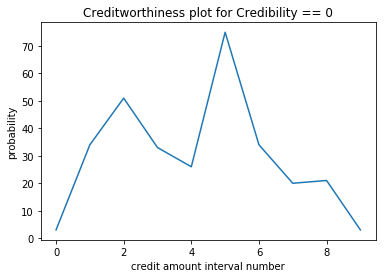

In [48]:
plt.plot(compareCreditWorthinessDf.Credibiliity0)
plt.xlabel('credit amount interval number')
plt.ylabel('probability')
plt.title("Creditworthiness plot for Credibility == 0")

Text(0.5, 1.0, 'Creditworthiness plot for Credibility == 1')

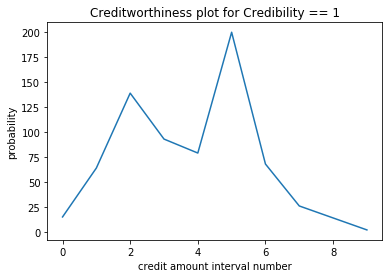

In [47]:
plt.plot(compareCreditWorthinessDf.Credibiliity1)
plt.xlabel('credit amount interval number')
plt.ylabel('probability')
plt.title("Creditworthiness plot for Credibility == 1")

# 6. Prepare input data for the model

In [50]:
X = np.array(pima_df.CreditAmount)
Y = pima_df.Creditability.astype('category')

# 7. Fit logistic regression model

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.6, random_state = 52 )
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.631360
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.029     
Dependent Variable: Creditability    AIC:              509.0878  
Date:               2019-07-28 18:21 BIC:              517.0707  
No. Observations:   400              Log-Likelihood:   -252.54   
Df Model:           1                LL-Null:          -260.19   
Df Residuals:       398              LLR p-value:      9.1629e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      1.0663     0.1641    6.4991   0.0000    0.7447    1.3878
x1        -0.0001     0.0000   -3.8026   0.0001   -0.0002   -0.0001
=================================================================

"""

# 8. Test accuracy calculation

In [63]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,
                               "predicted_prob": lg.predict( sm.add_constant( X_test ) ) } )
    return y_pred_df

X_test[0:5]

array([2141, 2957, 2012, 3108,  662], dtype=int64)

In [64]:
y_pred_df = get_predictions(X_test, lg )
y_pred_df['originalCredibility'] = np.array(y_test)
y_pred_df[0:5]

,actual,predicted_prob,originalCredibility
0,2141,0.685534,1
1,2957,0.661494,1
2,2012,0.689249,1
3,3108,0.656947,0
4,662,0.726620,1


In [72]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
y_pred_df[0:10]

,actual,predicted_prob,originalCredibility,predicted
0,2141,0.685534,1,1
1,2957,0.661494,1,1
2,2012,0.689249,1,1
3,3108,0.656947,0,1
4,662,0.726620,1,1
5,3001,0.660172,1,1
6,11998,0.367781,0,0
7,3017,0.659691,1,1
8,3398,0.648135,1,1
9,12976,0.337865,0,0


# 9. Build a confusion matrix

In [71]:
def draw_cm( actual, predicted ):
  #  cm = metrics.confusion_matrix( actual, predicted, [1,0] )
   # sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    #plt.ylabel('True label')
    #plt.xlabel('Predicted label')
    #plt.show()
    draw_cm( y_pred_df.originalCredibility, y_pred_df.predicted )

In [70]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.68


# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

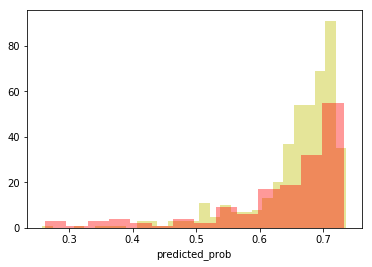

In [82]:
sns.distplot( y_pred_df[y_pred_df.originalCredibility == 1]["predicted_prob"], kde=False, color = 'y' )
sns.distplot( y_pred_df[y_pred_df.originalCredibility == 0]["predicted_prob"], kde=False, color = 'r' )